In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sympy

DIFFUSIVITY = 0.6 # Diffusivity, may want to check the vaidity of this paticular number
r_0 = 1.2 # In fm, may want to chose a better value for small nuclei
A_C = 10 # The number of nucleons in the core
TOT_ANG_MOMENTUM = 0.5 # Total angular momentum
ORB_ANG_MOMENTUM = 0 # Orbital angular momentum

BETA_INITIAL_GUESS = 0.05 # In [fm]^-2
INITAL_C_GUESS = 0.01
V_LS = - 21.0
r, a, j, l, R0, V0, Vls = sympy.symbols('r a j l R0 V0 Vls')

We now define the potentials for the expasion of N gaussians for N = 2, 5, 10

In [109]:
def two_gaussian_potential(r, c_1, beta_1, c_2, beta_2, orb_ang_moment=ORB_ANG_MOMENTUM):
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    return V_0 * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2))

def five_gaussian_potential(r, c_1, beta_1, c_2, beta_2, c_3, beta_3, c_4, beta_4, c_5, beta_5, orb_ang_moment=ORB_ANG_MOMENTUM):
    """
    Defines our gaussian potential as a sum of 5 different potentials of the form V_0 e^(beta*r^2), for a set
    of beta.
    Input
    r : 1D array
    """
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    return (V_0) * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2) + c_3 * np.exp(
        -beta_3 * r**2) + c_4 * np.exp(-beta_4 * r**2) + c_5 * np.exp(-beta_5 * r**2))

def twelve_gaussian_potential(r, c_1, beta_1, c_2, beta_2, c_3, beta_3, c_4, beta_4, c_5, beta_5, c_6, beta_6,
                              c_7, beta_7, c_8, beta_8, c_9, beta_9, c_10, beta_10, c_11, beta_11, c_12, beta_12,
                              orb_ang_moment=ORB_ANG_MOMENTUM):
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    return (V_0) * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2) + c_3 * np.exp(
        -beta_3 * r**2) + c_4 * np.exp(-beta_4 * r**2) + c_5 * np.exp(-beta_5 * r**2) + c_6 * np.exp(
        -beta_6 * r**2) + c_7 * np.exp(-beta_7 * r**2) + c_8 * np.exp(-beta_8 * r**2) + c_9 * np.exp(
        -beta_9 * r**2) + c_10 * np.exp(-beta_10 * r**2) + c_11 * np.exp(-beta_11 * r**2) + c_12 * np.exp(-beta_12 * r**2))
    

We now get an algerbraic expresion for our potential including spin orbit coupling

In [98]:
def finding_full_woods_saxon_potential(r, a, V0, Vls, R0, j, l):
    
    woods_saxon_function = 1 / (1 + sympy.exp(((r - R0) / a)))
    woods_saxon_derivative = sympy.diff(woods_saxon_function, r)

    woods_saxon_term = V0 * woods_saxon_function
    l_dot_s = (( j * (j + 1)) - (l * (l + 1))- (3 / 4)) / 2
    spin_orbit_term = Vls * l_dot_s * (1 / r) * woods_saxon_derivative

    return woods_saxon_term + spin_orbit_term

print(finding_full_woods_saxon_potential(r, a, V0, Vls, R0, j, l))

V0/(exp((-R0 + r)/a) + 1) - Vls*(j*(j + 1)/2 - l*(l + 1)/2 - 0.375)*exp((-R0 + r)/a)/(a*r*(exp((-R0 + r)/a) + 1)**2)


We now have an algerbraic expresion for our complete woods saxon potential. We now want to save this as a n expression not in sympy in order to evaluate in the curve_fit function for our gaussain parameters


In [99]:
def complete_potential(radius, tot_ang_moment=TOT_ANG_MOMENTUM, orb_ang_moment=ORB_ANG_MOMENTUM, V_ls=V_LS, diffusivity=DIFFUSIVITY, r_0=r_0, num_core_nucleons=A_C):
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    R_0 = r_0 * num_core_nucleons**(1/3)
    centeral_potential_term = V_0 / (np.exp((radius - R_0) / diffusivity) + 1)
    spin_orbit_coupling_term = ((tot_ang_moment * (tot_ang_moment + 1)) / 2) - ((orb_ang_moment * (
        orb_ang_moment + 1)) / 2) - 0.375
    woods_saxon_derivative = np.exp((radius - R_0) / diffusivity) / (diffusivity * radius * (
        np.exp((radius - R_0) / diffusivity) + 1)**2)

    return centeral_potential_term - V_ls * spin_orbit_coupling_term * woods_saxon_derivative

In [100]:
r_values = np.linspace(0.0000000000000000001, 12, 1000000)

two_gaussian_curve_fit_result, two_gaussian_covariances = curve_fit(
        two_gaussian_potential, r_values, complete_potential(r_values), [
            0.292, 0.617, 0.559, 0.276], maxfev=100000)
print(two_gaussian_curve_fit_result)
#note: diagonal elements of the covariance matrix will give the variance on each fit parameter
two_gaussian_errors = np.sqrt(np.diag(covariances))
print(errors)

[0.38777886 0.12410091 0.66917554 0.12410815]
[2.60980307e+03 1.70615008e-03 2.60980308e+03 1.71489470e-03]


In [116]:
r_values = np.linspace(0.0000000000000000001, 12, 1000)

twelve_gaussian_curve_fit_result, twelve_gaussian_covariances = curve_fit(
        twelve_gaussian_potential, r_values, complete_potential(r_values), [
        0.272822, 4.16493, -1.30687, 2.84325, 3.3052, 1.94098, -5.6565, 1.32504,
        6.5652, 0.904553, -3.36817, 0.617505, -2.43681, 0.421548, 2.63772, 0.287775,
        0.718998, 0.196454, 0.234668, 0.134112, 0.0186034, 0.0915532, 0.00107583, 0.0625], maxfev=10000000)
print(twelve_gaussian_curve_fit_result)
#note: diagonal elements of the covariance matrix will give the variance on each fit parameter
twelve_gaussian_errors = np.sqrt(np.diag(twelve_gaussian_covariances))
print(twelve_gaussian_errors)

C:\Users\faola\AppData\Local\Temp\ipykernel_17268\1773341690.py:20: RuntimeWarning: overflow encountered in exp
  return (V_0) * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2) + c_3 * np.exp(
C:\Users\faola\AppData\Local\Temp\ipykernel_17268\1773341690.py:21: RuntimeWarning: overflow encountered in exp
  -beta_3 * r**2) + c_4 * np.exp(-beta_4 * r**2) + c_5 * np.exp(-beta_5 * r**2) + c_6 * np.exp(
C:\Users\faola\AppData\Local\Temp\ipykernel_17268\1773341690.py:21: RuntimeWarning: overflow encountered in multiply
  -beta_3 * r**2) + c_4 * np.exp(-beta_4 * r**2) + c_5 * np.exp(-beta_5 * r**2) + c_6 * np.exp(
C:\Users\faola\AppData\Local\Temp\ipykernel_17268\1773341690.py:20: RuntimeWarning: invalid value encountered in add
  return (V_0) * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2) + c_3 * np.exp(
C:\Users\faola\AppData\Local\Temp\ipykernel_17268\1773341690.py:22: RuntimeWarning: overflow encountered in exp
  -beta_6 * r**2) + c_7 * np.exp(-beta_7 * r**2) +

[ 3.17616761e-03  4.09944016e+01 -2.34813431e+00  1.62127087e+00
  2.45491023e+00  1.62126645e+00 -1.96452006e+01  7.19943615e-01
  5.16756222e+01  6.30417598e-01 -2.99832021e+01  5.24313716e-01
 -2.69557973e+01  5.24320035e-01  1.40337263e+01  4.54928878e-01
  1.01062547e+01  4.54934191e-01  1.00281029e+00  2.01071183e-01
  1.05308535e-01  1.06790772e-01  5.36720295e-01  2.01065771e-01]
[3.21155315e-05 8.31708558e-01 7.32793013e+01 2.79414799e+01
 7.32691277e+01 2.67282534e+01 5.04836802e+02 7.89328552e-01
 4.41290868e+02 1.28232665e+00 9.07154026e+02 9.73103310e+00
 8.65395728e+02 1.06120000e+01 7.90939628e+02 1.84922743e+01
 7.84322151e+02 2.55441890e+01 2.81922081e+02 5.38437684e+01
 1.87814874e-02 2.85070447e-03 2.81932662e+02 1.00579837e+02]


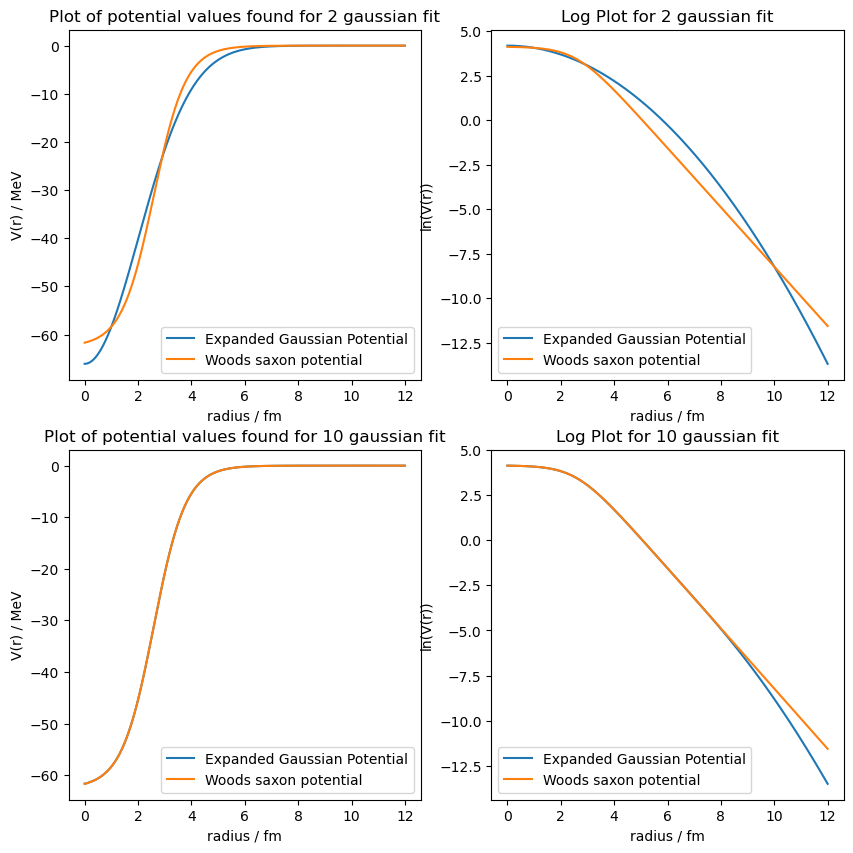

In [117]:
fig = plt.figure(figsize=(10, 10))
spec = fig.add_gridspec(ncols=2, nrows=2)
ax_1 = fig.add_subplot(spec[0, 0])
ax_2 = fig.add_subplot(spec[0, 1])
ax_3 = fig.add_subplot(spec[1, 0])
ax_4 = fig.add_subplot(spec[1, 1])

g2_C_1, g2_BETA_1, g2_C_2, g2_BETA_2 = two_gaussian_curve_fit_result
g12_C_1, g12_BETA_1, g12_C_2, g12_BETA_2, g12_C_3, g12_BETA_3, g12_C_4, g12_BETA_4, g12_C_5, g12_BETA_5, g12_C_6, g12_BETA_6, g12_C_7, g12_BETA_7, g12_C_8, g12_BETA_8, g12_C_9, g12_BETA_9, g12_C_10, g12_BETA_10, g12_C_11, g12_BETA_11, g12_C_12, g12_BETA_12 = twelve_gaussian_curve_fit_result

ax_1.set_title('Plot of potential values found for 2 gaussian fit')
ax_1.set_xlabel('radius / fm')
ax_1.set_ylabel('V(r) / MeV')
ax_1.plot(r_values, two_gaussian_potential(r_values, g2_C_1, g2_BETA_1, g2_C_2, g2_BETA_2), label=f'Expanded Gaussian Potential')
ax_1.plot(r_values, complete_potential(r_values), label='Woods saxon potential')
ax_1.legend(loc='lower right')

ax_2.set_title('Log Plot for 2 gaussian fit')
ax_2.set_xlabel('radius / fm')
ax_2.set_ylabel('ln(V(r))')
ax_2.plot(r_values, np.log( -two_gaussian_potential(r_values, g2_C_1, g2_BETA_1, g2_C_2, g2_BETA_2)), label=f'Expanded Gaussian Potential')
ax_2.plot(r_values, np.log( -complete_potential(r_values)), label='Woods saxon potential')
ax_2.legend(loc='lower left')

ax_3.set_title('Plot of potential values found for 10 gaussian fit')
ax_3.set_xlabel('radius / fm')
ax_3.set_ylabel('V(r) / MeV')
ax_3.plot(r_values, twelve_gaussian_potential(r_values, g12_C_1, g12_BETA_1, g12_C_2, g12_BETA_2, g12_C_3, g12_BETA_3, g12_C_4, g12_BETA_4,
                                       g12_C_5, g12_BETA_5, g12_C_6, g12_BETA_6, g12_C_7, g12_BETA_7, g12_C_8, g12_BETA_8,
                                       g12_C_9, g12_BETA_9, g12_C_10, g12_BETA_10, g12_C_11, g12_BETA_11, g12_C_12, g12_BETA_12), label=f'Expanded Gaussian Potential')
ax_3.plot(r_values, complete_potential(r_values), label='Woods saxon potential')
ax_3.legend(loc='lower right')

ax_4.set_title('Log Plot for 10 gaussian fit')
ax_4.set_xlabel('radius / fm')
ax_4.set_ylabel('ln(V(r))')
ax_4.plot(r_values, np.log( -twelve_gaussian_potential(r_values, g12_C_1, g12_BETA_1, g12_C_2, g12_BETA_2, g12_C_3, g12_BETA_3, g12_C_4, g12_BETA_4,
                                       g12_C_5, g12_BETA_5, g12_C_6, g12_BETA_6, g12_C_7, g12_BETA_7, g12_C_8, g12_BETA_8,
                                       g12_C_9, g12_BETA_9, g12_C_10, g12_BETA_10, g12_C_11, g12_BETA_11, g12_C_12, g12_BETA_12)), label=f'Expanded Gaussian Potential')
ax_4.plot(r_values, np.log( -complete_potential(r_values)), label='Woods saxon potential')
ax_4.legend(loc='lower left')

plt.savefig('potentials_plot.png', dpi=300)
plt.show()